## More ch4

In [46]:
# the usual starting block
# added pandas
import numpy as np 
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import pandas as pd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  
# asking jupyter to show all output on execution, not just the final value
# other options:  instead of "all"  use "last_expr" or "none"

SyntaxError: invalid syntax (<ipython-input-46-6f1ea8de3871>, line 11)

### Read file1 to use for examples

In [2]:
# read file1 to use for example data
dat1 = pd.read_csv('~/Desktop/DATA3401/Week 5/file1.dms')
dat1.head()

,carname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 4.2 Measures of center

### Pandas .mean() method  

Returns arithmetic mean = sample average = our old friend = $\bar x = \frac{1}{n} \sum^n_{i=1} x_i$.  

In [3]:
dat1['disp'].mean()               # mean of selected column
dat1[['disp', 'hp', 'wt']].mean() # mean of selected columns
dat1.mean()                       # mean of all columns

233.84687500000004

disp    233.846875
hp      146.687500
wt        3.217250
dtype: float64

mpg      20.090625
cyl       6.187500
disp    233.846875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

### Pandas .median() and .mode() methods

These work the same way as .mean().  

Know the relationship between mean and median for symmetric, skewed left, and skewed right distributions. 

### Weighted mean = more general version of $\bar x$ = $\frac{\sum^n_{i=1} a_i x_i} {\sum^n_{i=1} a_i}$

Weights $a_i$ are usually integers or percentages.  

If percentages, it's good to make them add up to 1.  This is called normalizing the weights.  

If weight are integers, they often count how many times a particular value occurs.  

In [4]:
cylinder_table = pd.crosstab(index = dat1['cyl'], columns = 'count')
cylinder_table['count']
cylinder_table.columns

cyl
4    11
6     7
8    14
Name: count, dtype: int64

Index(['count'], dtype='object', name='col_0')

### We can use this table to compute a weighted average where weights count how many times a value occurs.  

In [5]:
np.average(cylinder_table.index, weights = cylinder_table['count'])
# try again but this time use weights that sum to 1

6.1875

### Same result as simple average: 

In [6]:
dat1['cyl'].mean()

6.1875

In [14]:
dat1['cyl'].describe()

count    32.000000
mean      6.187500
std       1.785922
min       4.000000
25%       4.000000
50%       6.000000
75%       8.000000
max       8.000000
Name: cyl, dtype: float64

In [15]:
dat1['disp'].describe()

count     32.000000
mean     233.846875
std      126.349224
min       71.100000
25%      120.825000
50%      196.300000
75%      350.250000
max      472.000000
Name: disp, dtype: float64

### 4.3 Measures of variability (spread, dispersion, variation)

#### Pandas .var(), .std(), .mad() 

### 4.4 Boxplots

#### Five-number summary: min, Q1, median, Q3, max

#### Pandas .describe() method

##### range = max - min

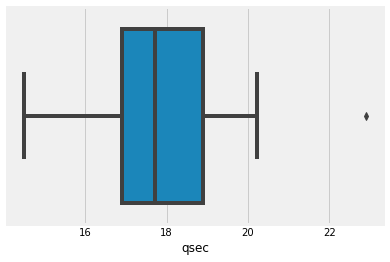

In [7]:
sns.boxplot(x = dat1['qsec'], data = dat1, width = .8)

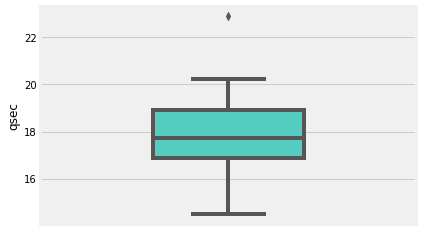

In [8]:
sns.boxplot(y = dat1['qsec'], data = dat1, color = 'turquoise', width = .4)

#### Grouped boxplot:  
Try to group by number of cylinders:  

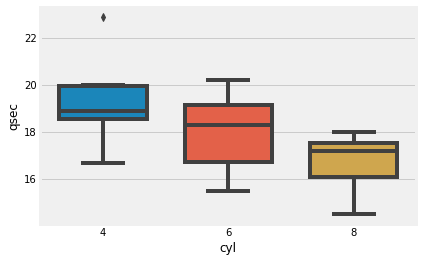

In [20]:
sns.boxplot(x = dat1['cyl'] , y = dat1['qsec'] , data = dat1, width = .7)
#skew-left for blue, symetric for red and skew-right for yellow

In [21]:
sns.boxplot #click shift-tab and run it to see the function, shift-tab many times to ?sns.boxplot
## plt.boxplot

<function seaborn.categorical.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)>

#### try adding a notch, investigate bootstrapping

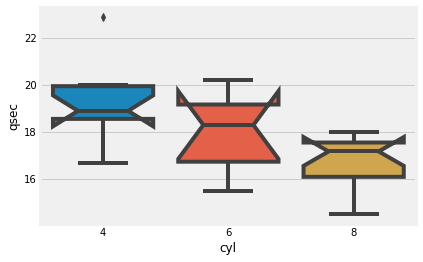

In [22]:
sns.boxplot(x = dat1['cyl'] , y = dat1['qsec'] , data = dat1, notch = True) #not enough data to do the notch

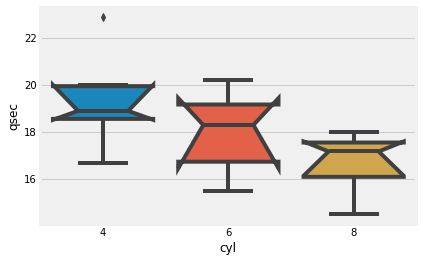

In [33]:
#bootstrap in python
sns.boxplot(x = dat1['cyl'] , y = dat1['qsec'] , data = dat1, notch = True, bootstrap = 500)


In [40]:
#scipy. for random number for create the uniform plot
stats.beta.rvs(5,2, size = 1)
stats.uniform.pdf()

array([0.88908082])

NameError: name 'ss' is not defined

(0.0, 4)

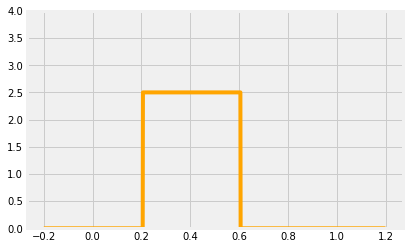

In [62]:
plt.ylim(top = 4)
x = 0.406
h = .2
xvec = np.arange(-0.2,1.2,0.001) #1.2 made bigger range, 0.001 witch of the box
yvec = stats.uniform.pdf(xvec, x-h, 2*h)
plt.plot(xvec, yvec, c = 'orange')
#stats.uniform.pdf(x)

#### it's nice to keep this handy because you never know when you might feel like dropping in an image
![this guy](highest_avg_gross.jpg)

<img src="highest_avg_gross.jpg" style="width:400px;height:800px"/>